In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data=pd.read_csv('Ads_Optimisation.csv')

In [5]:
import random
N=10000
d=10
ads_selected=[]
total_reward=[]
for n in range(0,N):
  ad=random.randrange(d)
  ads_selected.append(ad)
  reward=data.values[n,ad]
  total_reward=total_reward+reward

In [6]:
pd.Series(ads_selected).head(1000).value_counts(normalize=False)

6    116
1    105
5    104
9    101
2     99
8     96
3     96
4     95
7     94
0     94
dtype: int64

In [7]:
#Implementing UCB
import math
N=10000
d=10
ads_selected=[]
numbers_of_selection=[0]*d
sums_of_reward=[0]*d
total_reward=0

In [8]:
for n in range(0,N):
  ad=0
  max_upper_bound=0
  for i in range(0,d):

    if (numbers_of_selection[i]>0):
      average_reward=sums_of_reward[i]/numbers_of_selection[i]
      delta_i=math.sqrt(2*math.log(n+1)/numbers_of_selection[i])
      upper_bound=average_reward+delta_i
    else:
     upper_bound=1e200
     if upper_bound>max_upper_bound:
       max_upper_bound=upper_bound
       ad=i
    ads_selected.append(ad)
    numbers_of_selection[ad]+=1
    reward=data.values[n,ad]
    sums_of_reward[ad]+=reward
    total_reward+=reward



In [9]:
pd.Series(ads_selected).head(1500).value_counts(normalize=True)

0    0.970000
1    0.006000
2    0.005333
3    0.004667
4    0.004000
5    0.003333
6    0.002667
7    0.002000
8    0.001333
9    0.000667
dtype: float64

In [10]:
plt.hist(ads_selected)
plt.title('Histogram of ads Selected')
plt.xlabel('Ads')
plt.ylabel('No of times each ad was selected by the algorithm')

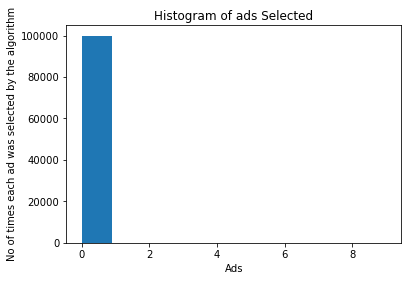

In [11]:
plt.show()